# Imports

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
PATH = "/content/drive/MyDrive/images"

# Question 1

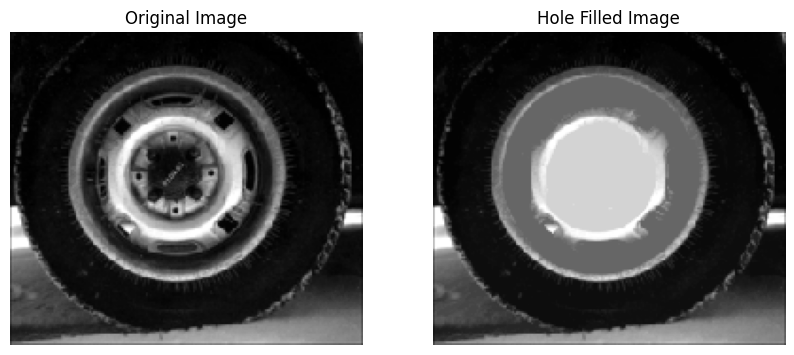

In [6]:
IMAGE_PATH_Q1 = PATH + "/q1.png"
image_q1 = cv2.imread(IMAGE_PATH_Q1, cv2.IMREAD_GRAYSCALE)


def morphological_reconstruction_by_erosion(marker, image):
  kernel = np.ones((3, 3), np.uint8)
  while True:
    next_marker = cv2.erode(marker, kernel, iterations = 1)
    next_marker = np.maximum(next_marker, image)
    if np.array_equal(next_marker, marker):
      #if ith image == i+1th image break condition of reconstruction by erosion
        break
    marker = next_marker
  return marker

def calculate_hole_filling(image):
  #ready marker
  marker = np.copy(image)
  max_value = image.max()
  for i in range(1, marker.shape[0] - 1):
    for j in range(1, marker.shape[1] - 1):
      marker[i, j] = max_value

  return morphological_reconstruction_by_erosion(marker, image) #return the value of reconstruction by erosion function

filled_image = calculate_hole_filling(image_q1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_q1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filled_image, cmap='gray')
plt.title('Hole Filled Image')
plt.axis('off')

plt.show()

# Question 2

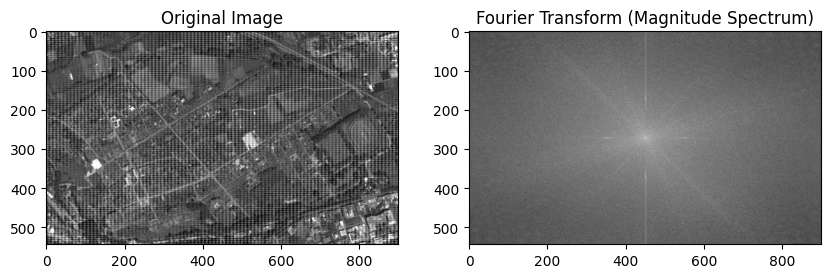

In [46]:
def examine_fourier_transform(image_path):
  # Step 1: Load the grayscale image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(img, cmap='gray')

  # Step 2: Compute the 2D Fourier Transform
  fft = np.fft.fft2(np.float32(img))
  fft_shift = np.fft.fftshift(fft)  # Shift the zero-frequency component to the center

  # Step 3: Compute the magnitude spectrum
  magnitude_spectrum = 20 * np.log(np.abs(fft_shift) + 1)

  # Step 4: Visualize the magnitude spectrum
  plt.subplot(1, 2, 2)
  plt.title("Fourier Transform (Magnitude Spectrum)")
  plt.imshow(magnitude_spectrum, cmap='gray')
  plt.show()

# Call the function with your image path
image_path = PATH + "/q2.png"  # Replace with the actual image path
examine_fourier_transform(image_path)


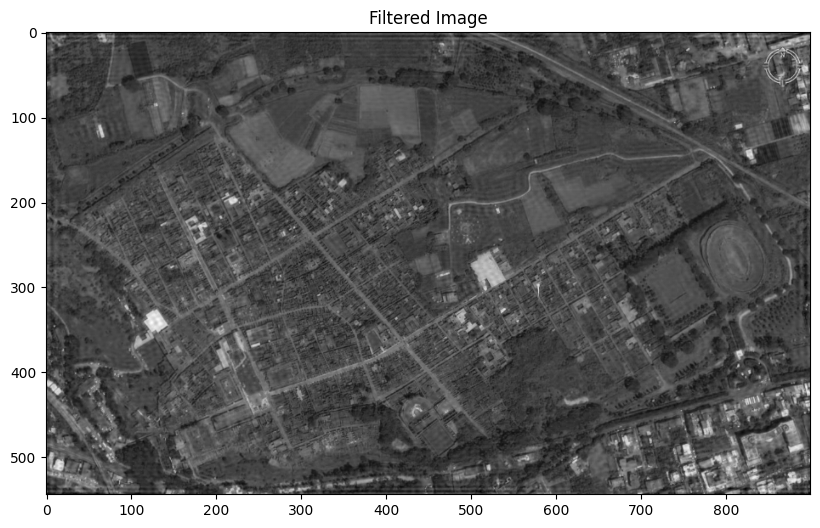

In [8]:
def ideal_band_reject_filter(shape, D0, W):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # Center of the frequency domain
  H = np.ones((rows, cols), np.float32)

  for u in range(rows):
    for v in range(cols):
      D = np.sqrt((u - crow)**2 + (v - ccol)**2)
      if D0 - W/2 <= D <= D0 + W/2:
        H[u, v] = 0
  return H

def apply_ideal_band_reject_filter(image_path, D0, W):
  # Load image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Perform Fourier Transform
  fft_transform = np.fft.fft2(np.float32(img))
  fft_shift = np.fft.fftshift(fft_transform)

  # Compute magnitude spectrum for visualization
  # Create a Gaussian low-pass filter
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2  # center of the image



  # Create Ideal Band Reject Filter
  rows, cols = img.shape
  filter_H = ideal_band_reject_filter((rows, cols), D0, W)

  # Apply filter
  filtered_dft = fft_shift * filter_H

  # Inverse Fourier Transform
  f_ishift = np.fft.ifftshift(filtered_dft)
  img_filtered = np.fft.ifft2(f_ishift)
  img_filtered = np.abs(img_filtered)

  # Display results
  plt.figure(figsize=(12, 6))
  plt.title("Filtered Image")
  plt.imshow(img_filtered, cmap='gray')
  plt.show()

  return img_filtered

image_path = PATH + "/q2.png"

# Replace 'image_path' with your image's path
ideal = apply_ideal_band_reject_filter(image_path, D0=100, W=20)


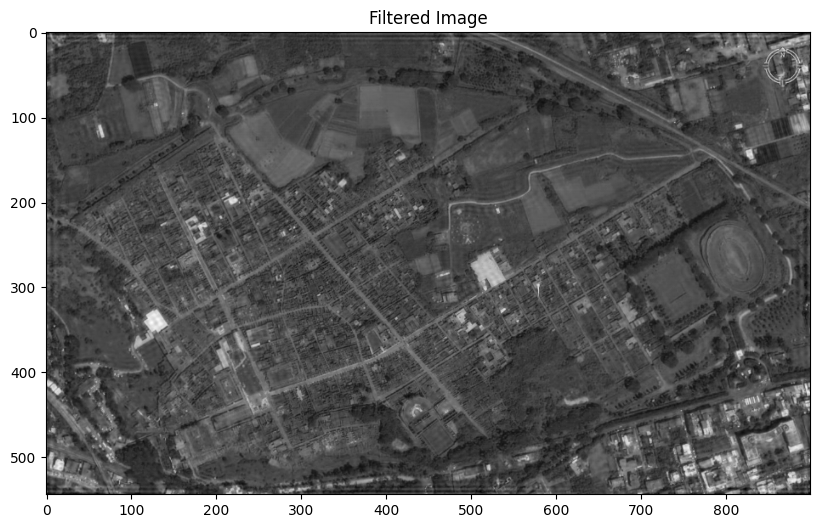

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_band_reject_filter(shape, D0, W, n):
  rows, cols = shape
  crow, ccol = rows // 2, cols // 2  # Center of the frequency domain
  H = np.zeros((rows, cols), np.float32)

  for u in range(rows):
    for v in range(cols):
      D = np.sqrt((u - crow)**2 + (v - ccol)**2)
      if D != 0:
        H[u, v] = 1 / (1 + ((D * W) / (D**2 - D0**2 + 1e-5))**(2 * n))
      else:
        H[u, v] = 1  # Prevent division by zero

  return H

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def apply_butterworth_band_reject_filter(image_path, D0, W):
  # Load image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Perform Fourier Transform
  fft_transform = np.fft.fft2(np.float32(img))
  fft_shift = np.fft.fftshift(fft_transform)

  # Compute magnitude spectrum for visualization
  # Create a Gaussian low-pass filter
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2  # center of the image



  # Create Ideal Band Reject Filter
  rows, cols = img.shape
  filter_H = butterworth_band_reject_filter((rows, cols), D0, W, 2)

  # Apply filter
  filtered_dft = fft_shift * filter_H

  # Inverse Fourier Transform
  f_ishift = np.fft.ifftshift(filtered_dft)
  img_filtered = np.fft.ifft2(f_ishift)
  img_filtered = np.abs(img_filtered)

  # Display results
  plt.figure(figsize=(12, 6))
  plt.title("Filtered Image")
  plt.imshow(img_filtered, cmap='gray')
  plt.show()

  return img_filtered

image_path = PATH + "/q2.png"

# Replace 'image_path' with your image's path
butterworth = apply_butterworth_band_reject_filter(image_path, D0=100, W=20)


In [10]:
print(f"Difference between image and ideal band filter is {np.mean((img - ideal) ** 2)}")
print(f"Difference between image and butterworth band filter is {np.mean((img - butterworth) ** 2)}")

Difference between image and ideal band filter is 665.6217829024215
Difference between image and butterworth band filter is 655.3941891014499


# Question 3


In [11]:
def apply_opening(image, kernel):
  eroded_image = cv2.erode(image, kernel)
  dilated_image = cv2.dilate(eroded_image, kernel)
  return dilated_image


In [12]:
def compute_granulometry(binary_image, max_radius):
  granulometry = []
  for radius in range(1, max_radius + 1):
    struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*radius + 1, 2*radius + 1))
    opened = apply_opening(binary_image, struct_elem)
    granulometry.append(np.mean(opened))
  return granulometry

In [13]:
def euclidean_distance(list1, list2):
  return np.linalg.norm(np.array(list1) - np.array(list2))

def manhattan_distance(list1, list2):
  return np.sum(np.abs(np.array(list1) - np.array(list2)))

def chebyshev_distance(list1, list2):
  return np.linalg.norm(np.array(list1) - np.array(list2), ord=np.inf)

In [14]:
unlabeled_images = ["/unlabeled-A.jpg", "/unlabeled-B.jpg", "/unlabeled-C.jpg"]
labeled_images = ["/labeled-1.jpg", "/labeled-2.jpg", "/labeled-3.jpg"]

In [15]:
unlabeled_image_paths = []
labeled_image_paths = []
for i in range(len(unlabeled_images)):
  unlabeled_image_paths.append(PATH + unlabeled_images[i])
  labeled_image_paths.append(PATH + labeled_images[i])

In [16]:
labeled_errors = []
for path in labeled_image_paths:
  image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  granulometry = compute_granulometry(image, 15)
  labeled_errors.append(granulometry)

unlabeled_errors = []

for path in labeled_image_paths:
  image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  granulometry = compute_granulometry(image, 15)
  unlabeled_errors.append(granulometry)



In [17]:
for i, unlabeled_mean in enumerate(unlabeled_errors):
  euclidean_distances = []
  manhattan_distances = []
  chebyshev_distances = []

  for labeled_error in labeled_errors:
    euclidean_distance_ = euclidean_distance(np.array(unlabeled_mean), np.array(labeled_error))
    manhattan_distance_ = manhattan_distance(np.array(unlabeled_mean), np.array(labeled_error))
    chebyshev_distance_ = chebyshev_distance(np.array(unlabeled_mean), np.array(labeled_error))

    euclidean_distances.append(euclidean_distance_)
    manhattan_distances.append(manhattan_distance_)
    chebyshev_distances.append(chebyshev_distance_)


  min_error_euclidean_label = np.argmin(euclidean_distances) + 1
  min_error_manhattan_label = np.argmin(manhattan_distances) + 1
  min_error_chebyshev_label = np.argmin(chebyshev_distances) + 1

  print(f"Error Results for unlabeled image {unlabeled_images[i]}:")
  print(f"Closest Labeled image using Euclidean Distance: Labeled-{min_error_euclidean_label}")
  print(f"Closest Labeled image using Manhattan Distance: Labeled-{min_error_manhattan_label}")
  print(f"Closest Labeled image using Chebyshev Distance: Labeled-{min_error_chebyshev_label}")
  print()

Error Results for unlabeled image /unlabeled-A.jpg:
Closest Labeled image using Euclidean Distance: Labeled-1
Closest Labeled image using Manhattan Distance: Labeled-1
Closest Labeled image using Chebyshev Distance: Labeled-1

Error Results for unlabeled image /unlabeled-B.jpg:
Closest Labeled image using Euclidean Distance: Labeled-2
Closest Labeled image using Manhattan Distance: Labeled-2
Closest Labeled image using Chebyshev Distance: Labeled-2

Error Results for unlabeled image /unlabeled-C.jpg:
Closest Labeled image using Euclidean Distance: Labeled-3
Closest Labeled image using Manhattan Distance: Labeled-3
Closest Labeled image using Chebyshev Distance: Labeled-3



# Question 4

## Helper functions to create noise and apply filters.

In [18]:
def add_salt_and_pepper_noise(image, noise_level):
  noisy_image = np.copy(image)
  total_pixels = image.shape[0] * image.shape[1]
  num_salt = int(noise_level * total_pixels / 2)
  num_pepper = int(noise_level * total_pixels / 2)

  for _ in range(num_salt):
    x, y = np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])
    noisy_image[x, y] = [255, 255, 255]

  for _ in range(num_pepper):
    x, y = np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])
    noisy_image[x, y] = [0, 0, 0]

  return noisy_image

In [31]:
def marginal_median_filter(image, kernel_size, ordering="lexicographical"):
  """Apply vector median filtering with specified ordering."""
  padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_REFLECT)
  filtered_image = np.zeros_like(image)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      neighborhood_r = padded_image[i:i+kernel_size, j:j+kernel_size, 0]
      neighborhood_g = padded_image[i:i+kernel_size, j:j+kernel_size, 1]
      neighborhood_b = padded_image[i:i+kernel_size, j:j+kernel_size, 2]


      filtered_image[i][j][0] = np.median(neighborhood_r)
      filtered_image[i][j][1] = np.median(neighborhood_g)
      filtered_image[i][j][2] = np.median(neighborhood_b)


          # Take the median


  return filtered_image

In [20]:
def marginal_median_filter2(image, kernel_size):

  #no need to pad the image according to kernel size, since medianBlur automatically handles it
  filtered_image = np.zeros_like(image)
  for channel in range(3):  # Process each channel independently
      filtered_image[:, :, channel] = cv2.medianBlur(image[:, :, channel], kernel_size) #cv2.medianBlur is used for
  return filtered_image


In [21]:
def l2_median(neighborhood, reference_pixel):
  """Find the L2 median vector in the neighborhood."""
  distances = []
  for pixel in neighborhood:
    # Compute L2 distance
    distance = np.linalg.norm(np.array(pixel) - np.array(reference_pixel))
    distances.append((distance, pixel))  # Store distance and pixel pair

  # Sort by distance
  distances.sort(key=lambda x: x[0])

  # Return the pixel at the median index
  median_index = len(distances) // 2
  return distances[median_index][1]


def l1_median(neighborhood, reference_pixel):
  """Find the L1 median vector in the neighborhood."""
  distances = []
  for pixel in neighborhood:
    # Compute L1 distance
    distance = np.sum(np.abs(np.array(pixel) - np.array(reference_pixel)))
    distances.append((distance, pixel))  # Store distance and pixel pair

  # Sort by distance
  distances.sort(key=lambda x: x[0])

  # Return the pixel at the median index
  median_index = len(distances) // 2
  return distances[median_index][1]


In [22]:
def vector_median_filter(image, kernel_size, ordering="lexicographical"):
  """Apply vector median filtering with specified ordering."""
  padded_image = cv2.copyMakeBorder(image, kernel_size // 2, kernel_size // 2, kernel_size // 2, kernel_size // 2, cv2.BORDER_REFLECT)
  filtered_image = np.zeros_like(image)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extract the neighborhood
      neighborhood = []
      for k in range(-kernel_size // 2, kernel_size // 2 + 1):
        for l in range(-kernel_size // 2, kernel_size // 2 + 1):
          neighborhood.append(padded_image[i + k + kernel_size // 2, j + l + kernel_size // 2])
      # Apply ordering
      if ordering == "lexicographical":
        neighborhood.sort(key=lambda x: (x[0], x[1], x[2]))
        filtered_image[i, j] = neighborhood[len(neighborhood) // 2]
      elif ordering == "l1":
        pixel = l1_median(neighborhood, padded_image[i, j])
        filtered_image[i, j] = pixel
      elif ordering == "l2":
        filtered_image[i, j] = l2_median(neighborhood, padded_image[i, j])


  return filtered_image


## Helper functions to import images and create image objects

In [23]:
import os
PATH_Q4 = "/content/drive/MyDrive/images/last question/"
images = os.listdir(PATH_Q4)
print(images)

['parrots.jpeg', 'RGB_24bits_palette_sample_image.jpg', 'Sample-of-24-bit-RGB-of-graphical-image-with-512512-pixels-N-2-i-j-i1-j-1-k.png', 'images.jpeg', 'Baboon-cover-imge_Q320.jpg', 'asian-domestic-cat-image-specification-260nw-2532928637.jpeg', '24_bit.png', 'Lenabmp-used-for-testing-purposes-Resolution-320x240-pixels-24-bit-RGB-Size-230454.jpg', 'EWNYZ.png', 'squirrel-animal-cute-rodents-47547.jpeg']


In [24]:
PATHS = []
for image in images:
  PATHS.append(PATH_Q4 + image)
PATHS

['/content/drive/MyDrive/images/last question/parrots.jpeg',
 '/content/drive/MyDrive/images/last question/RGB_24bits_palette_sample_image.jpg',
 '/content/drive/MyDrive/images/last question/Sample-of-24-bit-RGB-of-graphical-image-with-512512-pixels-N-2-i-j-i1-j-1-k.png',
 '/content/drive/MyDrive/images/last question/images.jpeg',
 '/content/drive/MyDrive/images/last question/Baboon-cover-imge_Q320.jpg',
 '/content/drive/MyDrive/images/last question/asian-domestic-cat-image-specification-260nw-2532928637.jpeg',
 '/content/drive/MyDrive/images/last question/24_bit.png',
 '/content/drive/MyDrive/images/last question/Lenabmp-used-for-testing-purposes-Resolution-320x240-pixels-24-bit-RGB-Size-230454.jpg',
 '/content/drive/MyDrive/images/last question/EWNYZ.png',
 '/content/drive/MyDrive/images/last question/squirrel-animal-cute-rodents-47547.jpeg']

In [25]:
def create_images_RGB(PATHS):
  images = []
  for path in PATHS:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
  return images


def create_images_LAB(PATHS):
  images = []
  for path in PATHS:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    images.append(image)
  return images

images = create_images_RGB(PATHS)
LAB_images = create_images_LAB(PATHS)

def mse(original, filtered):
    return np.mean((original - filtered) ** 2)

## Functions that calculates and displays errors

In [26]:
def calculate_results(images, kernel_size = 3, noise = 0.1):
  mse_values = []

  for image in images:
    # add noise and then filter with different techniques each image one by one
    noised_image = add_salt_and_pepper_noise(image, noise)
    marginal_median = marginal_median_filter(noised_image, kernel_size)
    lex_median = vector_median_filter(noised_image, kernel_size)
    l1_median = vector_median_filter(noised_image, kernel_size, "l1")
    l2_median = vector_median_filter(noised_image, kernel_size, "l2")

    mse_values.append([mse(image, marginal_median), mse(image, lex_median), mse(image, l1_median), mse(image, l2_median)])

    # Create a grid to display the images
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes = axes.ravel()

    # Titles for each stage
    titles = ["Original", "Noised", "Marginal Median", "Lex Median", "L1 Median", "L2 Median"]
    images_to_show = [image, noised_image, marginal_median, lex_median, l1_median, l2_median]

    for ax, img, title in zip(axes, images_to_show, titles):
      ax.imshow(img)
      ax.set_title(title)
      ax.axis('off')  # Turn off axes

  plt.tight_layout()
  plt.show()

  print(mse_values)

  return mse_values


In [27]:
def show_mse_results(mse_values, kernel_size = 3, noise = 0.1, color_space = "RGB"):
  # Number of photos (x-axis) and categories per photo (bars)
  num_photos = len(mse_values)
  num_categories = len(mse_values[0])  # Number of MSE values per photo

  # Create the x-axis positions for the groups of bars
  x = np.arange(num_photos)

  # Define bar width and adjust group positions
  bar_width = 0.2
  offsets = np.arange(-1.5, 1.5 + 1, step=1) * bar_width

  # Define colors for each category
  colors = ['red', 'blue', 'green', 'orange']
  labels = ['Marginal Median Filter', 'Vector Median Filter (lexicographical)', 'Vector Median Filter (l1)', 'Vector Median Filter (l2)']

  # Plot bars for each category
  plt.figure(figsize=(12, 6))
  for i in range(num_categories):
    plt.bar(x + offsets[i], [photo[i] for photo in mse_values], bar_width, label=labels[i], color=colors[i])

  # Set labels, title, and legend
  plt.xlabel("Photos")
  plt.ylabel("MSE Value")
  plt.title(f"MSE Values for Photos with 4 Categories (Kernel Size: {kernel_size} - Noise: {noise} - Color Space: {color_space})")
  plt.xticks(x, [f'Photo {i+1}' for i in range(num_photos)])
  plt.legend(loc="upper left")
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()

  # Show the bar graph
  plt.show()

## RESULTS

### Result with KERNEL SIZE = 3 - NOISE = 0.1

In [ ]:
initial_mse = calculate_results(images, kernel_size = 3, noise = 0.1)

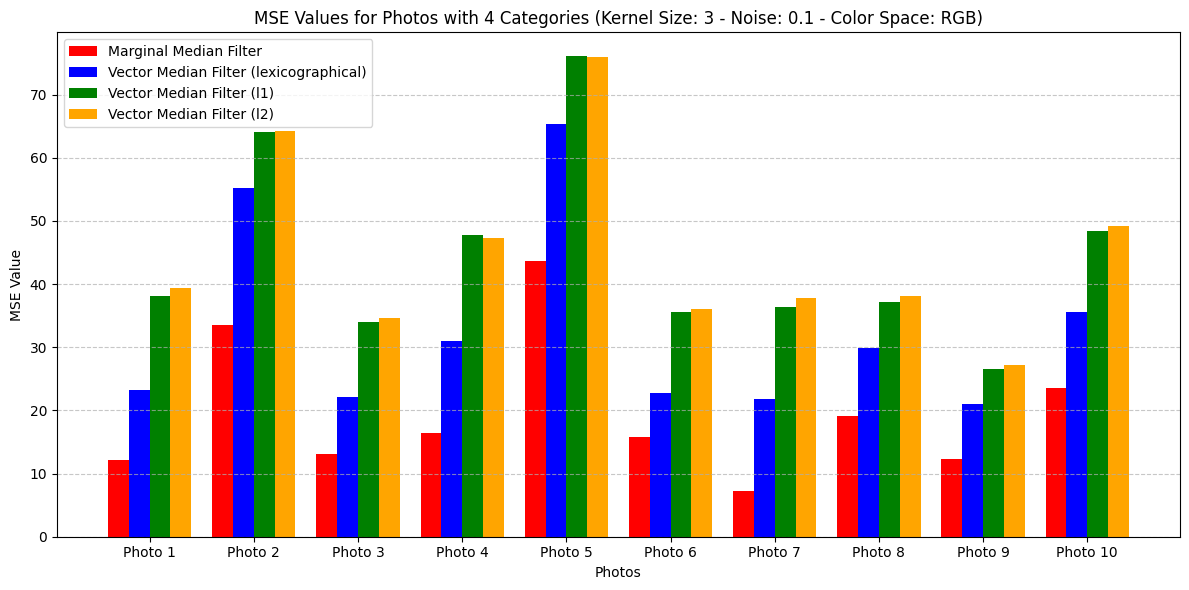

In [33]:
show_mse_results(initial_mse)

### Result with higher kernel KERNEL = 5 - NOISE = 0.1

In [ ]:
high_kernel_result = calculate_results(images, kernel_size = 5, noise = 0.1)

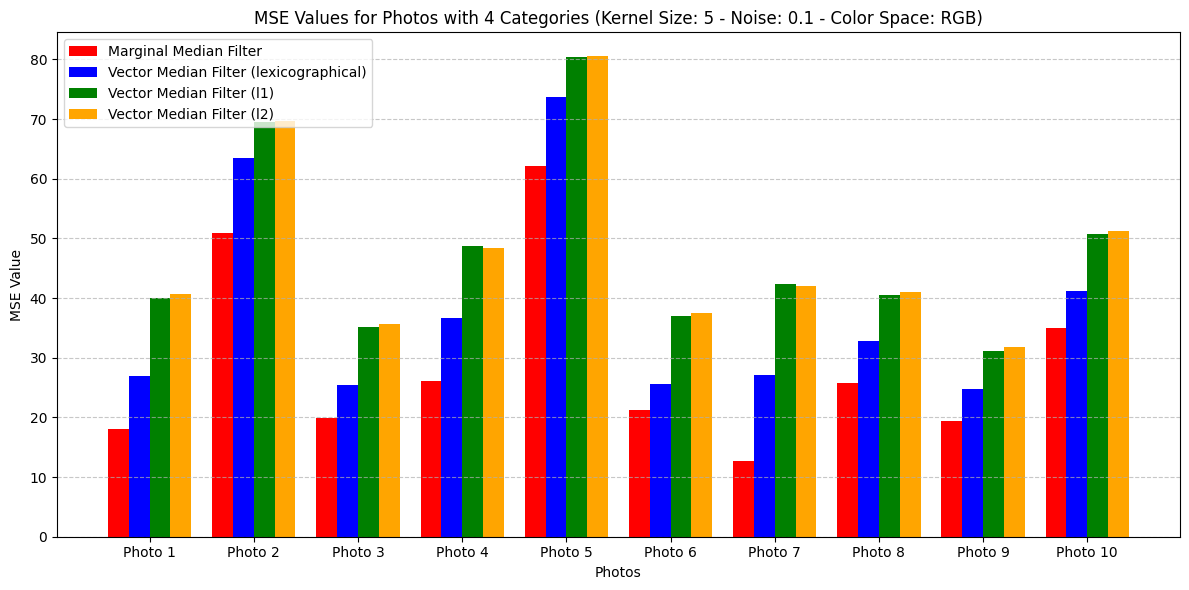

In [36]:
show_mse_results(high_kernel_result, kernel_size=5, noise=0.1)

### Result with higher noise KERNEL = 3 - NOISE = 0.3

In [ ]:
high_noise_result = calculate_results(images, kernel_size = 3, noise = 0.3)

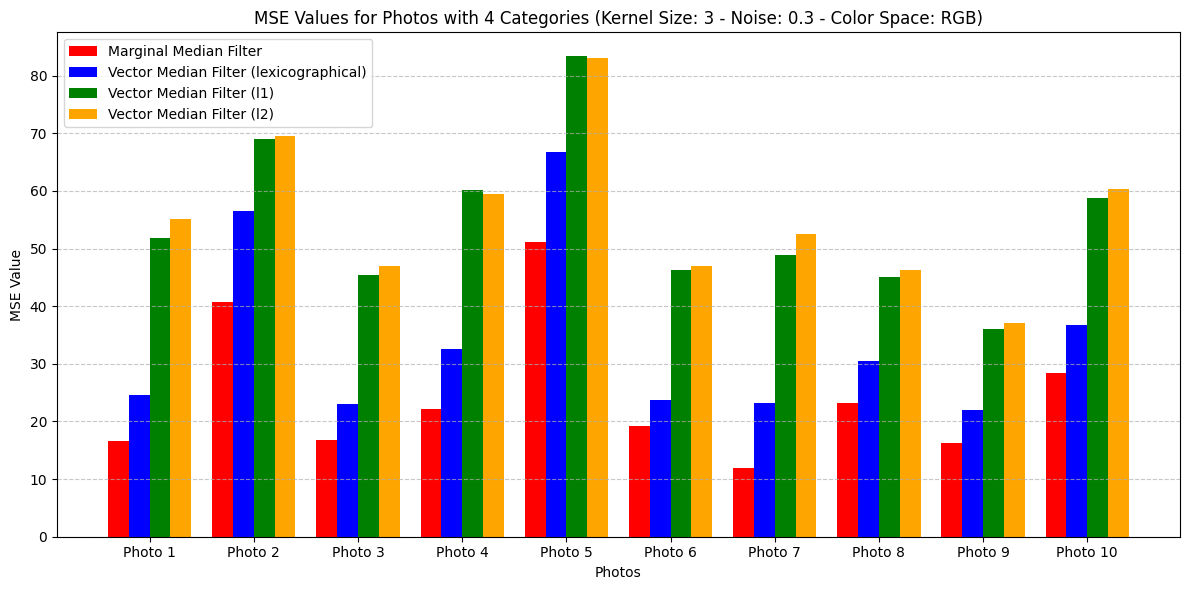

In [38]:
show_mse_results(high_noise_result, kernel_size=3, noise=0.3)

### LAB Color Space

In [ ]:
LAB_result = calculate_results(LAB_images, kernel_size = 3, noise = 0.1)

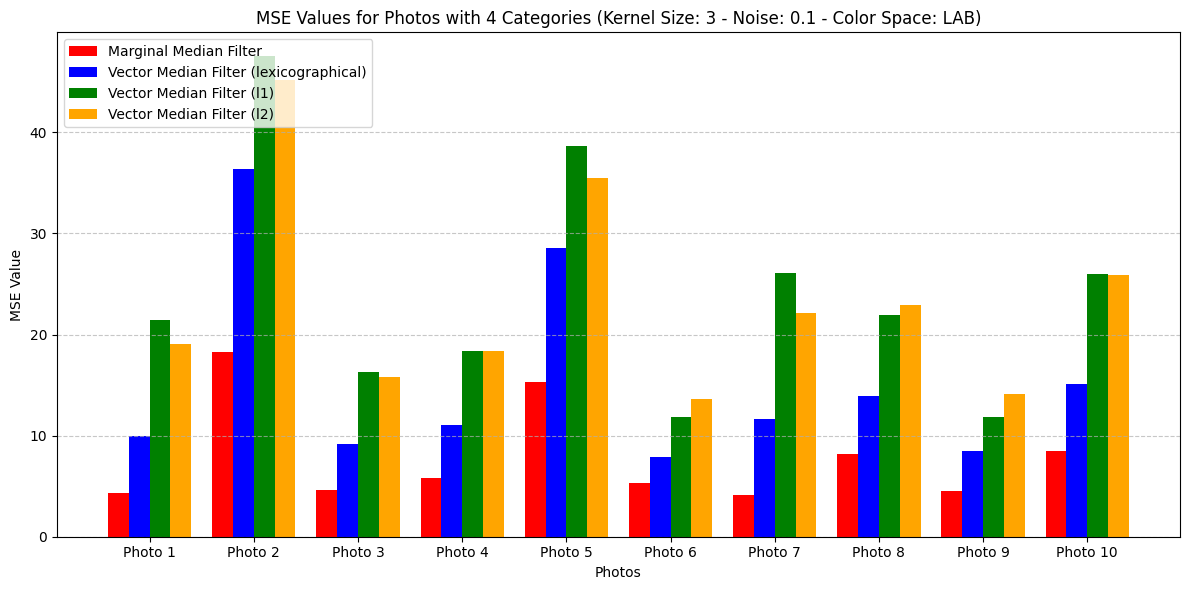

In [40]:
show_mse_results(LAB_result, kernel_size=3, noise=0.1, color_space = "LAB")

## TOTAL RESULTS

In [41]:
total_marginals = 0
total_lexi = 0
total_l1 = 0
total_l2 = 0

total_marginals_kernel = 0
total_lexi_kernel = 0
total_l1_kernel = 0
total_l2_kernel = 0


total_marginals_noise = 0
total_lexi_noise = 0
total_l1_noise = 0
total_l2_noise = 0

total_marginals_LAB = 0
total_lexi_LAB = 0
total_l1_LAB = 0
total_l2_LAB = 0


for i in range(len(initial_mse)):
  total_marginals += initial_mse[i][0]
  total_lexi += initial_mse[i][1]
  total_l1 += initial_mse[i][2]
  total_l2 += initial_mse[i][3]

  total_marginals_kernel += high_kernel_result[i][0]
  total_lexi_kernel += high_kernel_result[i][1]
  total_l1_kernel += high_kernel_result[i][2]
  total_l2_kernel += high_kernel_result[i][3]

  total_marginals_noise += high_noise_result[i][0]
  total_lexi_noise += high_noise_result[i][1]
  total_l1_noise += high_noise_result[i][2]
  total_l2_noise += high_noise_result[i][3]

  total_marginals_LAB += LAB_result[i][0]
  total_lexi_LAB += LAB_result[i][1]
  total_l1_LAB += LAB_result[i][2]
  total_l2_LAB += LAB_result[i][3]

print(total_marginals, total_marginals_kernel, total_marginals_noise, total_marginals_LAB)
print(total_lexi, total_lexi_kernel, total_lexi_noise, total_lexi_LAB)
print(total_l1, total_l1_kernel, total_l1_noise, total_l1_LAB)
print(total_l2, total_l2_kernel, total_l2_noise, total_l2_LAB)

197.03666810218584 290.91285313022036 246.44207753793376 79.00178554185747
327.7723433732036 377.61370569440646 339.2387286502616 152.1704609954807
444.2146470401829 475.46414675736565 544.9004552029265 239.9940263058918
450.0264687718525 478.4162006529224 557.2475305829815 232.63446797517116


### EFFECT OF NOISE

In [42]:
print("Noise 0.1")
print(total_marginals, total_lexi, total_l1, total_l2)
print("Noise 0.3")
print(total_marginals_noise, total_lexi_noise, total_l1_noise, total_l2_noise)


Noise 0.1
197.03666810218584 327.7723433732036 444.2146470401829 450.0264687718525
Noise 0.3
246.44207753793376 339.2387286502616 544.9004552029265 557.2475305829815


### EFFECT OF KERNEL SIZE

In [43]:
print("Kernel size: 3")
print(total_marginals, total_lexi, total_l1, total_l2)
print("Kernel size: 5")
print(total_marginals_kernel, total_lexi_kernel, total_l1_kernel, total_l2_kernel)

Kernel size: 3
197.03666810218584 327.7723433732036 444.2146470401829 450.0264687718525
Kernel size: 5
290.91285313022036 377.61370569440646 475.46414675736565 478.4162006529224


### EFFECT OF COLOR SPACE

In [44]:
print("Color space: RGB")
print(total_marginals, total_lexi, total_l1, total_l2)
print("Color space: LAB")
print(total_marginals_LAB, total_lexi_LAB, total_l1_LAB, total_l2_LAB)

Color space: RGB
197.03666810218584 327.7723433732036 444.2146470401829 450.0264687718525
Color space: LAB
79.00178554185747 152.1704609954807 239.9940263058918 232.63446797517116
